In [1]:
from src.solution import MultiODPath, MultiODSolution
from src.problem import MultiODProblem
from src.operators import TwoOptOperator, ExchangeOperator, InsertOperator, OForwardOperator, DBackwardOperator, ODPairsExchangeOperator
from src.utils import display_result

p = MultiODProblem(num_O=8, num_taxi=1, seed=1)
paths = [[0, 1, 9, 8, 16, 5, 17, 2, 4, 3, 7, 12, 6, 14, 13, 11, 10, 15, 0]]
paths1 = [[0, 1, 8, 9, 16, 5, 17, 2, 4, 3, 7, 12, 6, 14, 13, 11, 10, 15, 0]]  # sub-optimal
paths2 = [[0, 1, 9, 8, 16, 5, 17, 3, 2, 7, 4, 12, 6, 14, 13, 11, 10, 15, 0]]  # sub-optimal
s = MultiODSolution(paths2, p)

/usr/local/anaconda3/envs/miniconda3/lib/python3.10/site-packages/gymnasium/envs/registration.py:604: UserWarning: WARN: plugin: shimmy.registration:register_gymnasium_envs raised Traceback (most recent call last):
  File "/usr/local/anaconda3/envs/miniconda3/lib/python3.10/site-packages/gymnasium/envs/registration.py", line 602, in load_plugin_envs
    fn()
  File "/usr/local/anaconda3/envs/miniconda3/lib/python3.10/site-packages/shimmy/registration.py", line 262, in register_gymnasium_envs
    _register_dm_control_envs()
  File "/usr/local/anaconda3/envs/miniconda3/lib/python3.10/site-packages/shimmy/registration.py", line 26, in _register_dm_control_envs
    from shimmy.dm_control_compatibility import DmControlCompatibilityV0
  File "/usr/local/anaconda3/envs/miniconda3/lib/python3.10/site-packages/shimmy/dm_control_compatibility.py", line 18, in <module>
    from gymnasium.envs.mujoco.mujoco_rendering import MujocoRenderer
  File "/usr/local/anaconda3/envs/miniconda3/lib/python3.10

In [2]:
path = s.paths[0]

In [3]:
[n for n in path.block_dict[path.O_blocks[0]]]

[Node(node_id=9, OD_type=0, seq_id=2, block_id=0, in_block_seq_id=0, block_OD=0),
 Node(node_id=8, OD_type=0, seq_id=3, block_id=0, in_block_seq_id=1, block_OD=0)]

In [4]:
for O in path.O_blocks:
    print(path.block_dict[O])

SliceableDeque([Node(node_id=9, OD_type=0, seq_id=2, block_id=0, in_block_seq_id=0, block_OD=0), Node(node_id=8, OD_type=0, seq_id=3, block_id=0, in_block_seq_id=1, block_OD=0)])
SliceableDeque([Node(node_id=5, OD_type=0, seq_id=5, block_id=2, in_block_seq_id=0, block_OD=0)])
SliceableDeque([Node(node_id=3, OD_type=0, seq_id=7, block_id=4, in_block_seq_id=0, block_OD=0), Node(node_id=2, OD_type=0, seq_id=8, block_id=4, in_block_seq_id=1, block_OD=0), Node(node_id=7, OD_type=0, seq_id=9, block_id=4, in_block_seq_id=2, block_OD=0), Node(node_id=4, OD_type=0, seq_id=10, block_id=4, in_block_seq_id=3, block_OD=0)])
SliceableDeque([Node(node_id=6, OD_type=0, seq_id=12, block_id=6, in_block_seq_id=0, block_OD=0)])


In [5]:
o1 = TwoOptOperator()
o2 = ExchangeOperator()
o3 = InsertOperator()
o4 = OForwardOperator()
o5 = DBackwardOperator()
o6 = ODPairsExchangeOperator()

In [6]:
improved_path, min_delta, label = o1(s, 4)
# improved_path, min_delta, label = o1(s, 15)
if improved_path is not None:
    print(improved_path)
    print(p.is_feasible(s))
    print(p.calc_cost(s))

MultiODPath([0, 1, 9, 8, 16, 5, 17, 2, 3, 7, 4, 12, 6, 14, 13, 11, 10, 15, 0])
True
8.078578230600947


In [7]:
label

(7, 8)

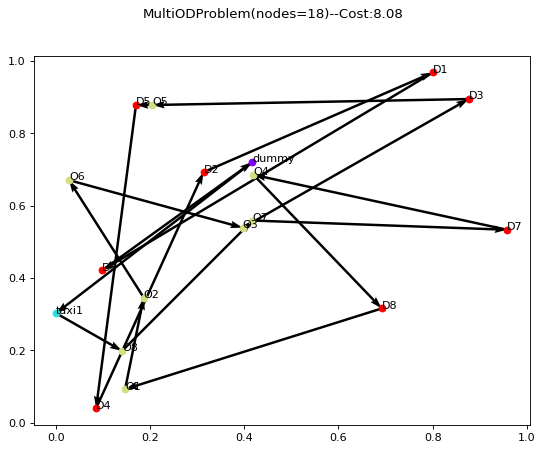

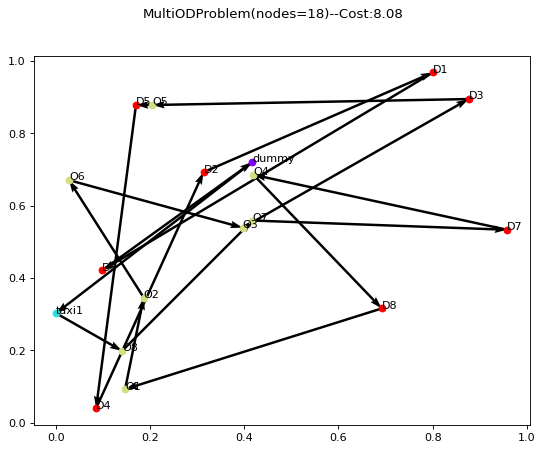

In [8]:
display_result(p, s)

In [9]:
# L2I operators, state

In [10]:
# operators:
# in-block optimization: 2-opt
# O up, D down
# O down, D up 